[source file](https://aapm.onlinelibrary.wiley.com/doi/pdfdirect/10.1118/1.3097633?casa_token=ryEnPyIfRDcAAAAA%3AeIj2nZpB0KUSQaCSn1j7T4L9hqnxivzgkT92j6TDlbAn0sRxcMtEHnOtRcKQXpAy_cY0box3MXCcUbFd4w)

In [343]:
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import skimage

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft, fftshift

from scipy.optimize import curve_fit

from scipy import integrate
from scipy.optimize import least_squares

# from chatGPT 

# create perfect image 

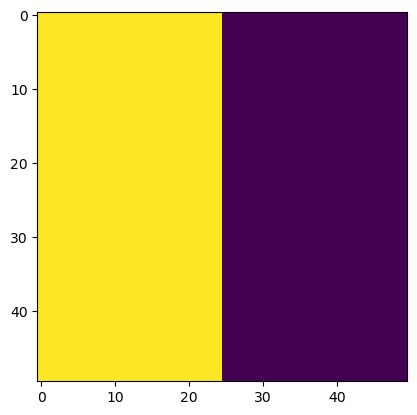

In [270]:
image = np.zeros((50,50))
image[:,:25] = 1600

plt.figure(0)
plt.imshow(image)

# give a slight angle to the image 

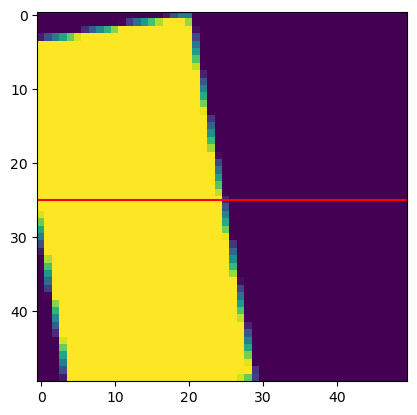

In [271]:
angle = 10 
rotated_image = skimage.transform.rotate(image, angle, resize=False)

plt.figure(1)
plt.imshow(rotated_image)
plt.axhline(25, color='r')

# Extract ESF 

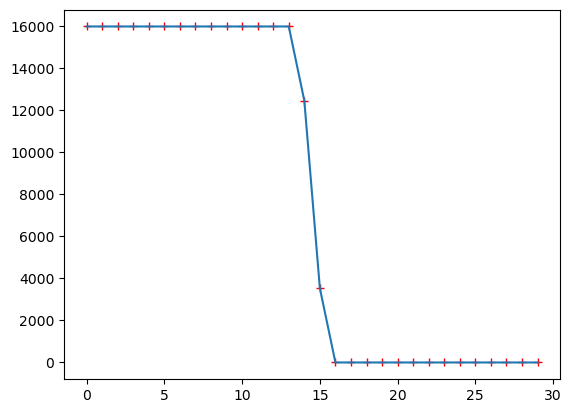

In [300]:
ytop = 30
ybottom = 20

xleft = 10
xright = 40

array_extracted = rotated_image[ybottom:ytop, xleft:xright]
ESF = np.sum(array_extracted, axis=0)

x=np.arange(len(ESF))

fig, ax = plt.subplots()
ax.plot(ESF, 'r+')
ax.plot(ESF)

In [301]:
esf = ESF

# SI function 

In [302]:
def si(x):
    y = lambda x: np.sin(x)/x
    return integrate.quad(y, 0, x)[0]

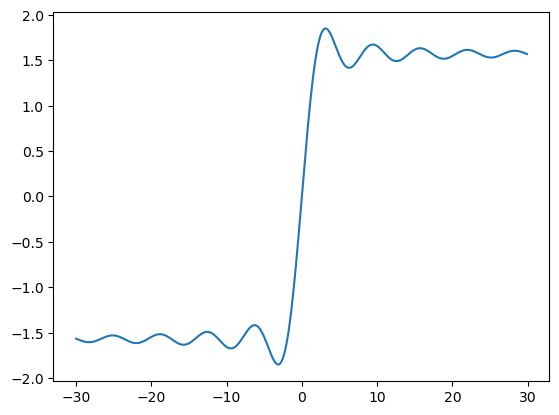

In [303]:
plt.figure(10)
test_x = np.arange(-30,30,0.1)
test_y = []
for _x in test_x:
    test_y.append(si(_x))
plt.plot(test_x, test_y)

# Fitting equation

In [333]:
def equation(x, k1, alpha, m, k2):
    para = alpha * np.pi * (x - m)
    # value1 = si(para)
    value1 = np.array([si(_value) for _value in para])
    return np.abs(k1*value1+k2)

In [334]:
x_to_fit = x
y_to_fit = esf

In [337]:
p0 = [16000, 0.5, 8000, 0]

popt, para = curve_fit(equation, x_to_fit, y_to_fit, p0)
popt

/var/folders/t8/307ghqxx5djb28nl56mkmx7j90c0xy/T/ipykernel_27428/3158169039.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(y, 0, x)[0]
/var/folders/t8/307ghqxx5djb28nl56mkmx7j90c0xy/T/ipykernel_27428/3158169039.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(y, 0, x)[0]


array([4.98190724e+04, 2.15403360e-01, 1.25004422e+04, 7.99208103e+04])

In [338]:
fitted_esf = equation(x_to_fit[:-1], *popt)

/var/folders/t8/307ghqxx5djb28nl56mkmx7j90c0xy/T/ipykernel_27428/3158169039.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(y, 0, x)[0]


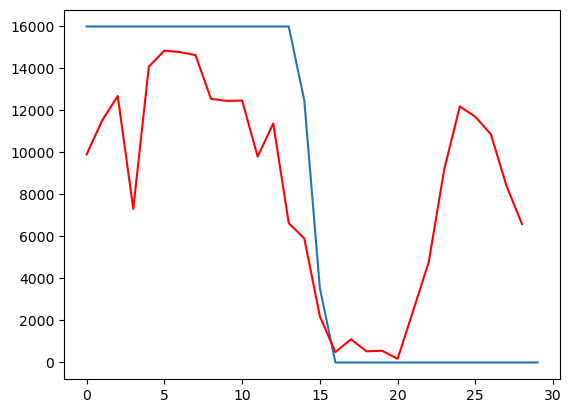

In [340]:
fig = plt.subplots()
plt.plot(ESF)
plt.plot(x[:-1], fitted_esf, 'r')
